In [1]:
import pandas as pd
import numpy as np
import os

import xgboost as xgb
import seaborn as sns

In [2]:
def drop_unnamed(data):
    names = data.columns
    for name in names:
        if "Unnamed" in name:
            data.pop(name)
    return data

In [3]:
data = pd.read_csv("/home/yeeunlee/bigcon2020_parrot/prep/data/performance_prime.csv")
data = drop_unnamed(data)
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour,prime
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,6,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,6,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00,6,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00,6,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00,6,0


In [ ]:
data = data.set_index('방송일시')
data.head(2)

In [4]:
data.shape

(35379, 13)

### Simple XGBoost

In [5]:
X = data[['노출(분)', '마더코드', '상품코드',
          '판매단가', 'week', 'hour', 'prime']]
Y = data[['취급액']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노출(분)   35379 non-null  float64
 1   마더코드    35379 non-null  int64  
 2   상품코드    35379 non-null  int64  
 3   판매단가    35379 non-null  int64  
 4   week    35379 non-null  int64  
 5   hour    35379 non-null  int64  
 6   prime   35379 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.9 MB


In [6]:
X.shape

(35379, 7)

In [7]:
model = xgb.XGBRegressor(learning_rate = 0.1,
                        max_depth = 5,
                        n_estimator = 100)

In [8]:
model.fit(X, Y)

[15:41:40] WARNING: /tmp/pip-build-20_cemy7/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=100, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [9]:
model.feature_importances_

array([0.08680747, 0.1352145 , 0.1047175 , 0.24278848, 0.03449896,
       0.1595909 , 0.23638214], dtype=float32)

판매단가, prime

<AxesSubplot:xlabel='취급액'>

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: Runt

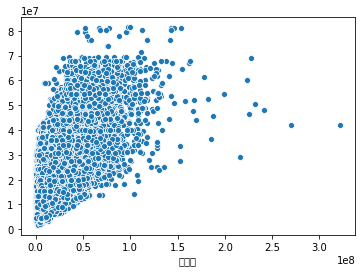

In [10]:
sns.scatterplot(data['취급액'], model.predict(X))

In [11]:
X.head(2)

,노출(분),마더코드,상품코드,판매단가,week,hour,prime
0,20.0,100346,201072,39900,1,6,0
1,20.0,100346,201079,39900,1,6,0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노출(분)   35379 non-null  float64
 1   마더코드    35379 non-null  int64  
 2   상품코드    35379 non-null  int64  
 3   판매단가    35379 non-null  int64  
 4   week    35379 non-null  int64  
 5   hour    35379 non-null  int64  
 6   prime   35379 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.9 MB


In [ ]:
# change data types 
X['마더코드'] = X['마더코드'].astype('U')
X['상품코드'] = X['상품코드'].astype('U')
X['week'] = X['week'].astype('U')
X['hour'] = X['hour'].astype('U')

### simple Neural Net Regression

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dropout, Dense, Input, Flatten
from tensorflow.keras.layers import concatenate, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split

print("tensorflow version : ", tf.__version__)

In [ ]:
s = 0 
for col in X.columns:
    if X[col].dtype == 'object':
        s+=len(X[col].unique())
print(s)

In [ ]:
inp_1 = Input(shape = (4, ))
emb = Embedding(3000, 64, input_length = 4)(inp_1)
out_1 = Flatten()(emb)

inp_2 = Input(shape = (3, ))
nn = Dense(64, activation='tanh')(inp_2)
out_2 = Flatten()(nn)

concat = concatenate([out_1, out_2])
concat = Dense(50, activation = 'tanh')(concat)
out = Dense(1)(concat)

model = Model([inp_1, inp_2], out)
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')
model.summary()

In [ ]:
hist = model.fit([X[['마더코드', '상품코드', 'hour', 'week']],
                 X[['노출(분)', '판매단가', 'prime']]],
                 Y,
                 epochs = 20,
                 batch_size = 70,
                 validation_split = 0.2,
                 shuffle = False)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()